# Group Assignment: Titanic EDA
Name: 

In this assignment, you will work in groups to explore the Titanic dataset. Follow the questions below and work together to answer each of them using `pandas`, `matplotlib`, and `seaborn` libraries. Each group is responsible for preparing a presentation summarizing the findings and visualizations.


### Titanic Dataset
https://www.kaggle.com/datasets/yasserh/titanic-dataset

## The Titanic dataset is one of the most well-known datasets for data analysis and machine learning. It provides detailed information about the passengers aboard the Titanic ship, which tragically sank during its maiden voyage in 1912. The dataset is often used to understand how different features such as gender, age, passenger class, and fare influenced a passenger's likelihood of survival. The key features in the dataset include:
### Q0. Get the informations from Kaggle
- PassengerId: Unique ID for each passenger. 
- Survived: Whether the passenger survivede or not (0=No, 1=Yes).
- Pclass: Passenger class (1=1st class, 2=2nd class, 3=3rd class).
- Name: Name of the passenger.
- Sex: Gender of the passenger.
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard the Titanic.
- Parch: Number of parents/children aboard the Titanic.
- Ticket: Ticket number.
- Fare: Fare paid by the passenger.
- Cabin: Cabin number.
- Embarked: Port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)

### Import Libraries and Load the Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("/Users/EvaKramarova/Downloads/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Q1: What are the columns present in the dataset?

Hint: Use a pandas function to list the columns.

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Q2: What is the structure of the dataset, and what are the datatypes of the columns?
Hint: Use the .info() method in pandas.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Q3: Provide a summary of the numerical data.
Hint: Use the .describe() function.

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Q4: Drop PassengerId, Name, Ticket, Cabin, Embarked. Why are we dropping the columns?
Hint: Use .drop() and axis=1

In [6]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
#Dropped because are unique values, we do not want to decide whther the person survived based on the PassenderId, Name, ticket, Cabin, Embarked

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


### Q5: Which columns have missing values, and how many?
Hint: Use .isnull().sum().

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Q6: How can you handle missing values in the 'Age' column?
Hint: Fill missing values with either the mean, median, or mode.

In [8]:
missing_dict={"Age": data["Age"].median() ,
}

In [9]:
data=data.fillna(value=missing_dict)

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Q7: What is the survival rate of passengers by gender?
Hint: Use groupby() on the "Sex" column and calculate the mean of the "Survived" column.

In [12]:
#avg_survived_per_sex=data.groupby('Sex')['Survived'].mean()
#avg_survived_per_sex

Text(0.5, 1.0, 'Fare Distribution')

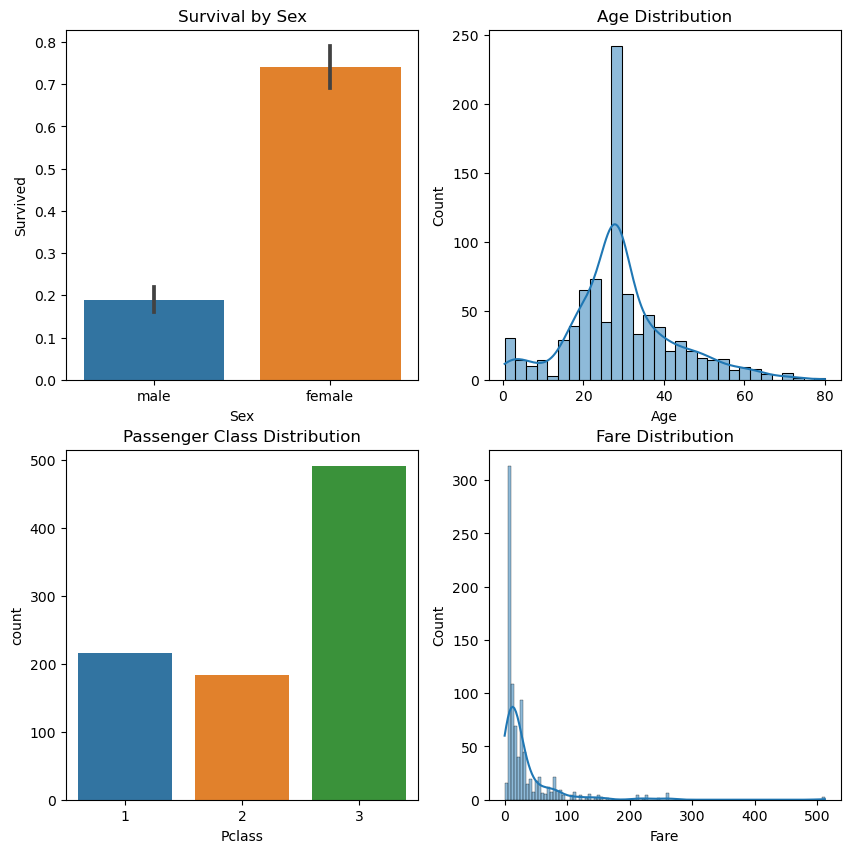

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))



# First plot - Bar plot for 'sex' column

sns.barplot(x='Sex', y='Survived', data=data, ax=axes[0, 0])

axes[0, 0].set_title('Survival by Sex')



# Second plot - Histogram for 'age' column

sns.histplot(data['Age'], kde=True, ax=axes[0, 1])

axes[0, 1].set_title('Age Distribution')



# Third plot - Count plot for 'class' column

sns.countplot(x='Pclass', data=data, ax=axes[1, 0])

axes[1, 0].set_title('Passenger Class Distribution')



# Fourth plot - Histogram for 'fare' column

sns.histplot(data['Fare'], kde=True, ax=axes[1, 1])

axes[1, 1].set_title('Fare Distribution')

### Q8: Create a bar plot of the survival rate by gender.
Hint: Use seaborn.barplot().

Text(0.5, 1.0, 'Survival Rate by Gender')

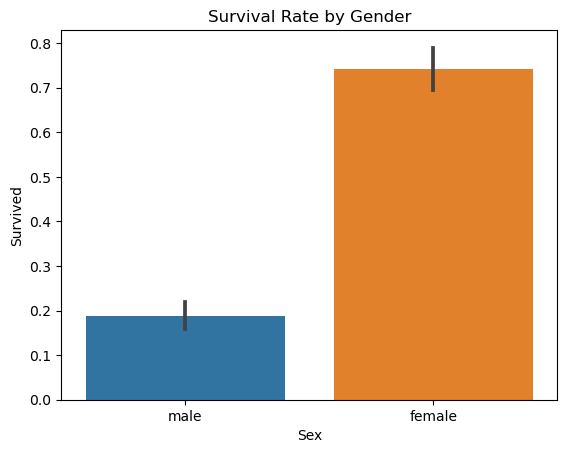

In [14]:
sns.barplot(x=data['Sex'],y=data['Survived'])
plt.title('Survival Rate by Gender')

### Q9: How many passengers were in each class (Pclass)?
Hint: Use .value_counts() on the "Pclass" column.

In [15]:
data.value_counts(['Pclass'])

Pclass
3         491
1         216
2         184
Name: count, dtype: int64

### Q10: What is the survival rate for each passenger class?
Hint: Group by "Pclass" and calculate the mean of "Survived".

In [16]:
avg_survived_per_pclass=data.groupby('Pclass')['Survived'].mean()
avg_survived_per_pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### Q11: Create a bar plot of survival rates by passenger class.
Hint: Use seaborn.barplot().

Text(0.5, 1.0, 'Survival Rate by Pclass')

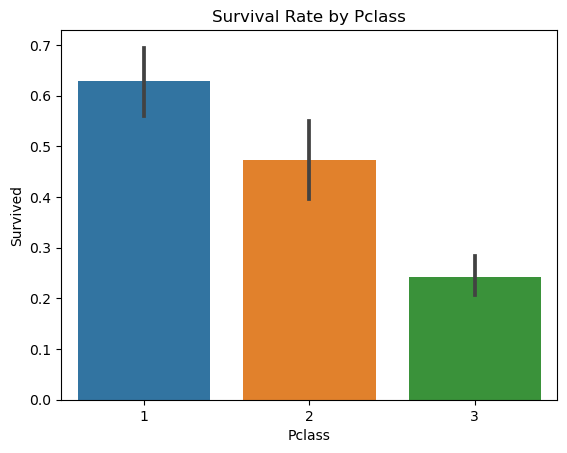

In [17]:
sns.barplot(x=data['Pclass'],y=data['Survived'])
plt.title('Survival Rate by Pclass')

### Q12: Plot the distribution of the 'Age' column.
Hint: Use seaborn.histplot() to plot a histogram.

Text(0.5, 1.0, 'Distribution of Age')

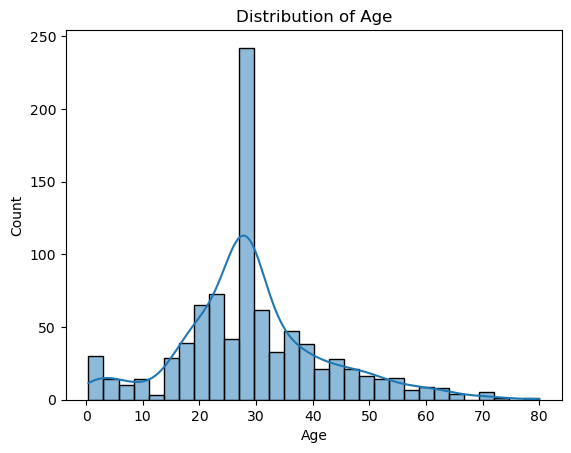

In [18]:
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')

### Q13: Create a box plot comparing survival by age.
Hint: Use seaborn.boxplot() to compare the distribution of age for survivors and non-survivors.

<Axes: xlabel='Survived', ylabel='Age'>

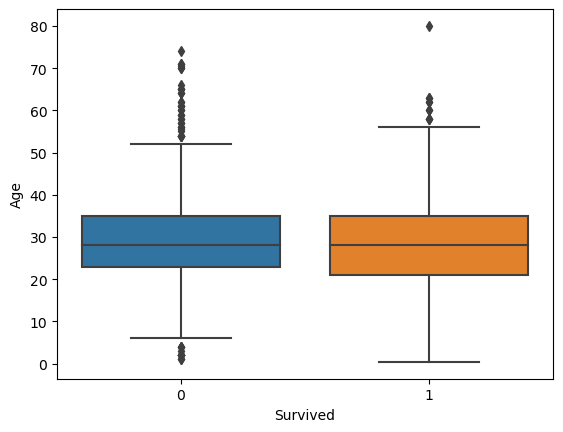

In [19]:
sns.boxplot(x=data['Survived'],y=data['Age'])

### Q14: Plot the distribution of the 'Fare' column.
Hint: Use seaborn.histplot().

Text(0.5, 1.0, 'Fare Distribution')

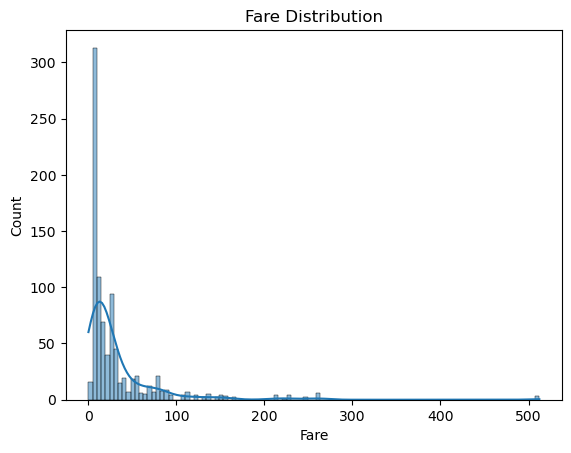

In [20]:
sns.histplot(data['Fare'],kde=True)
plt.title('Fare Distribution')

### Q15: What are the correlations between the numerical columns? Any pattern?
Hint: Use the .select_dtypes('number') and .corr() function and visualize the result with a heatmap.

In [21]:
data_num=data.select_dtypes('number')
data_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


<Axes: >

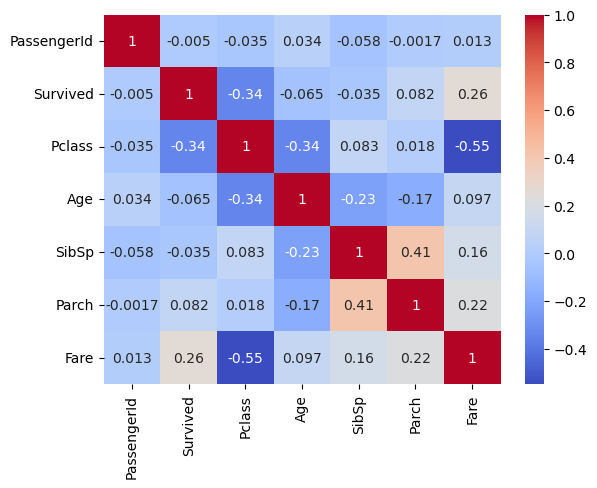

In [22]:
corr_matrix=data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm')


### Q16: Does having siblings or spouses aboard affect survival chances?
Hint: Group by the "SibSp" and Survived column.

In [26]:
data.groupby('SibSp')['Survived'].mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

### Q17: Create a scatter plot showing the relationship between fare and survival.
Hint: Use seaborn.scatterplot().

Text(0.5, 1.0, 'Fare and Survival Relationship')

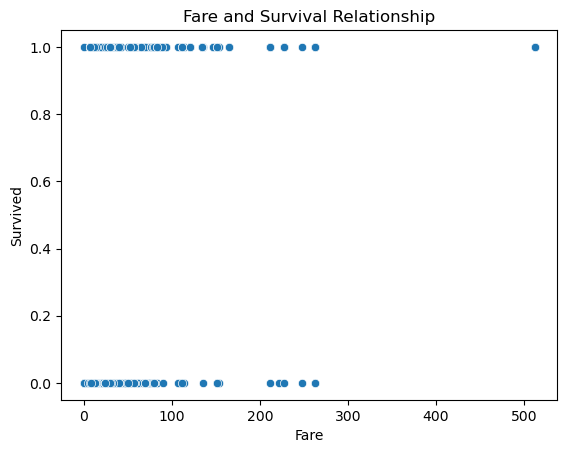

In [29]:
sns.scatterplot(x=data['Fare'], y=data['Survived'])
plt.title('Fare and Survival Relationship')

### Q18: Create a pie chart showing the distribution of passengers by class (Pclass).

Hint: Use matplotlib.pie() to create the pie chart.

<Axes: ylabel='count'>

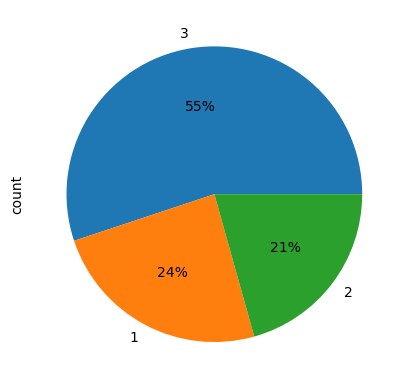

In [36]:
data['Pclass'].value_counts().plot.pie(autopct="%1.0f%%")

### Q19: Plot a line graph showing how the fare varies with the age of the passengers.

Hint: Use seaborn.lineplot() to plot the line graph.

Text(0.5, 1.0, 'Fair vs Age')

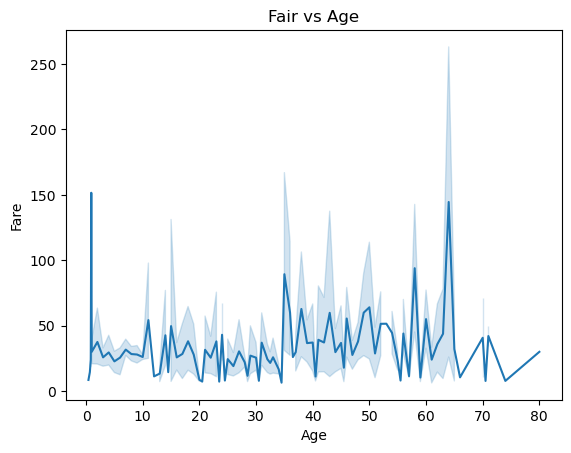

In [41]:
sns.lineplot(x=data['Age'], y=data['Fare'])
plt.title('Fair vs Age')

### Q20. Create a pairplot of the numerical features (Age, Fare, SibSp, Parch) in the dataset to explore the relationships between them.

Hint: Use seaborn.pairplot() to plot pairwise relationships.

/Users/evakramarova/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


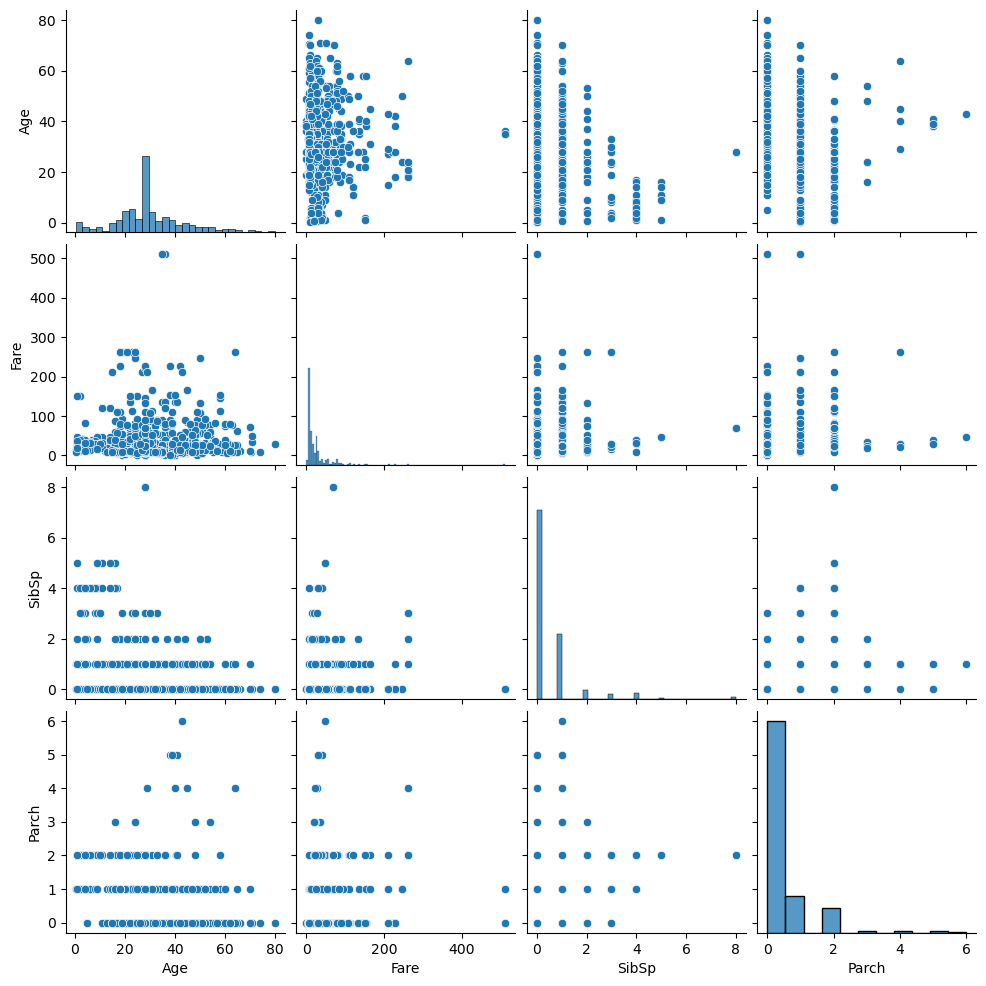

In [40]:
sns.pairplot(data[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

## Summary:  Based on the visualizations you have created so far (bar plots, histograms, scatter plots, etc.), analyze which features (such as 'Pclass', 'Sex', 'Age', and 'Fare') seem to influence the survival of passengers. What patterns can you identify from these visualizations, and which plot provided the clearest insight?

#### The barplot of the survival rates by passenger class provided the clearest insight since it clearly showed a taller bar for the First Class, therefore, proving the idead that the First Class passengers had the highest survival rate. 
#### Also, by looking at the heatmap, the Survival and Fare has a weak positive correlation but if it is compared to other correlations, it appears to be the strongest. Therefore, the heatmap is consistent with the barplot of the survival rates by passenger class, since passenger class and fare are related features. 